<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Árvores de Decisão

É um algoritmo de machine learning, sendo um modelo de aprendizagem  supervisionado, que pode ser utilizado tanto para classificação quanto para regressão.

In [36]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
#modelo usado
from sklearn.tree import DecisionTreeClassifier

In [38]:
PATH = "http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1"

In [39]:
#dataframe
df = pd.read_csv(PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
# 1 - Definir modelo
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [41]:
# 2 - Features
X = df.drop('num', axis=1)
y = df['num']

In [42]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [43]:
# 2.1 - Dividir as features
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
# 2.2 - Treinar o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
# 3 - predição
y_pred = model.predict(X_test)

In [46]:
# 4 - Métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.83        35
           1       0.94      0.71      0.81        41

    accuracy                           0.82        76
   macro avg       0.83      0.83      0.82        76
weighted avg       0.84      0.82      0.81        76



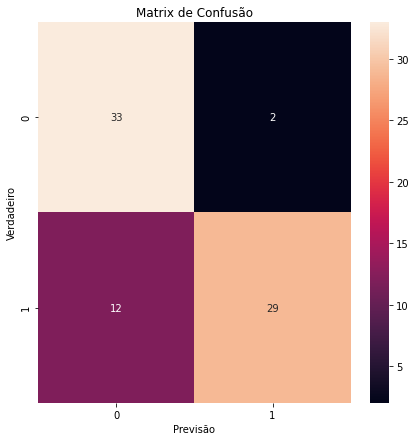

In [47]:
fig, ax = plt.subplots(figsize = (7,7))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
ax.set_title("Matrix de Confusão")
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsão')
plt.show()